In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.datasets import make_moons


In [153]:
from tensorflow.keras.applications import vgg16

In [158]:
X,y = make_moons(n_samples=50, noise=0.2, random_state=42)
print(X.shape, y.shape)
len(X[0])

(50, 2) (50,)


2

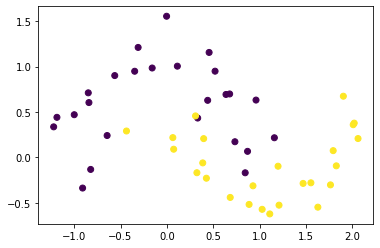

In [159]:
#Plot scatterplot of the 2 columns of X data
x = X
y = y

plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

### 1. Feed Forward Network

#### Create function that will add bias

Since we are modeling our data set with a bias (all ones), we need to add a third column to our X array.

In [160]:
#hstack - horizontally stack
X = np.hstack([X, np.ones((X.shape[0],1))])

In [161]:
def add_bias(X):
    X = np.hstack([X, np.ones((X.shape[0],1))])
    return X

#### Create activation function - SIGMOID

Write a python function, sigmoid, that accepts a NumPy array as an input, and returns a NumPy array where all of the original values have been transformed by the sigmoid / logistic function (or, as 3Blue1Brown would call it, the “squishification” function :) ).

#### sigmoid: $$y = \frac{1}{1+ e^{-x}}$$

In [162]:
def sigmoid(X):
    y = 1 / (1 + np.exp(-X))
    return y

Test sigmoid function.

In [163]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

#### Generate weights of the network, for each layer, neuron and input

Initialise the network with random weights.

In [164]:
#random input weights
w_1 = np.random.rand(3,2)
w_2 = np.random.rand(3,1)

### Implement FFN function

#### Step 1
We need to calculate the weigthed sum, therefore we are going to calculate the "dot" product of X and the weights of the input layer

In [165]:
step1 = np.dot(X,w_1) # --> shape = (50,3)*(3,2) which shape we get?
step1.shape

(50, 2)

#### Step 2

Apply activation function to step1

In [166]:
# applying the sigmoid function on the first step
# find the output in the hidden layer
out1 = sigmoid(step1)
out1.shape

(50, 2)

#### Step 3

Add bias to out1

In [167]:
step3 = add_bias(out1)
step3.shape

(50, 3)

#### Step 4

Calculate the weighted sum - calculate the dot product of step3 & weights of the output layer

In [168]:
step4 = np.dot(step3, w_2)
step3.shape, w_2.shape, step4.shape

((50, 3), (3, 1), (50, 1))

#### Step 5

Apply activation function (Sigmoid) to step4

In [169]:
out2 = sigmoid(step4)
out2

array([[0.7033387 ],
       [0.70054881],
       [0.70163959],
       [0.7122181 ],
       [0.69348729],
       [0.71629661],
       [0.69711803],
       [0.69360228],
       [0.69754001],
       [0.69059259],
       [0.70594162],
       [0.7100249 ],
       [0.70701956],
       [0.70886834],
       [0.70452336],
       [0.70311605],
       [0.70612084],
       [0.71544336],
       [0.71528774],
       [0.69858364],
       [0.70830356],
       [0.70383564],
       [0.68032406],
       [0.69803383],
       [0.69888728],
       [0.70241642],
       [0.70928744],
       [0.69835084],
       [0.70023528],
       [0.70794356],
       [0.70310726],
       [0.70978174],
       [0.70184683],
       [0.70482665],
       [0.68462229],
       [0.70852733],
       [0.70777861],
       [0.69935314],
       [0.68395022],
       [0.7024908 ],
       [0.70892597],
       [0.68633104],
       [0.69239006],
       [0.71475174],
       [0.68897627],
       [0.70577279],
       [0.71131107],
       [0.701

#### Write a function for FFN

Assume for two layers in this case

In [170]:
def feed_forward(X, weights):
    '''
    1. Multiply the input matrix X
       with the weights of the first layer.
    
    2. Apply the sigmoid function on the result.
    
    3. Append an extra column of ones to the result 
       (i.e. the bias)
    
    4. Multiply the output of the previous step
       with the weights of the second (i.e. outer) layer.
    
    5. Apply the sigmoid function on the result.
    
    6. Return all intermediate results (i.e. anything that is
       outputted by an activation function).
    '''
   
    
    weights0 = weights[0]
    weights1 = weights[1]
    
    # multiply the input matrix X with the weights of the first layer
    input1 = np.dot(X, weights0)
    
    # apply the sigmoid function on the result
    out1 = sigmoid(input1)
    
    # append an extra column of ones to the result
    hidden1 = add_bias(out1)
    
    # multiply the output of previous step with weights of second layer
    input2 = np.dot(hidden1, weights1)
    
    # apply the sigmoid function on the result
    out2 = sigmoid(input2)
    
    #return all intermediate results
    return out1, out2

### 2. Backpropagation

#### Create a function for the derivative of the sigmoid activation function

In [171]:
def sigmoid_der(X):
    """ derivative of sigmoid with respect to X"""
    return sigmoid(X) * (1-sigmoid(X))

#### Write a loss function and its derivative also.

In [172]:
def log_loss(ytrue, ypred):
    loss = -((ytrue * np.log(ypred)) + (1-ytrue) * np.log(1-ypred))
    return loss

def log_loss_deriv(ytrue, ypred):
    loss_deriv = -(ytrue/ypred - (1-ytrue)/(1-ypred))
    return loss_deriv

Test if both functions work.

In [173]:
ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

In [174]:
a = np.array([0.5, 0.3, 0.99, 0.2])
b = np.array([0.4, 0.2, 0.10, 0.3])
expected = np.array([-0.42, -0.62, -9.89, 0.48])
assert np.all(log_loss_deriv(a, b).round(2) == expected)

#### Calculate initial Loss

In [175]:
#out1, out2 = feed_forward(X, weights0)
ytrue = y.reshape(-1, 1)
log_loss(ytrue, out2)

array([[1.21516418],
       [0.35589123],
       [0.35433542],
       [0.33937109],
       [1.18249606],
       [0.33366094],
       [0.36080054],
       [0.36585656],
       [0.3601954 ],
       [1.17309639],
       [1.22397697],
       [1.23796024],
       [0.34669695],
       [1.23397966],
       [1.21916548],
       [1.21441396],
       [0.3479689 ],
       [0.33485285],
       [0.33507038],
       [1.19926272],
       [1.23204161],
       [1.21684071],
       [1.14044748],
       [0.35948771],
       [0.35826581],
       [1.21206014],
       [0.34349441],
       [0.35903367],
       [0.35633889],
       [1.23080822],
       [0.35224582],
       [1.23712201],
       [0.35404009],
       [1.22019246],
       [1.15398428],
       [1.23280905],
       [0.34562393],
       [0.35759946],
       [1.15185553],
       [0.35312297],
       [1.23417764],
       [1.15941712],
       [1.17892271],
       [0.33582001],
       [1.16788606],
       [1.22340297],
       [0.34064543],
       [1.208

In [176]:
log_loss(ytrue, out2).sum()

38.85847632600487

### Write a Backpropagation Function

In [177]:
def backprop(weights,
             output1,
             output2,
             ytrue,
             X_input,
             LR):

    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:'''
    loss_gradient = log_loss_deriv(ytrue , output2)
    
    '''EQUATION B:'''
    # don't forget the bias!
    hidden_out_with_bias = add_bias(output1)
    # derivative of the sigmoid function with respect to the
    # hidden output * weights
    sig_deriv_1 = sigmoid_der(hidden_out_with_bias.dot(wO))
    y_grad = sig_deriv_1 * loss_gradient
    
    print('hidden_out_with_bias shape:', hidden_out_with_bias.shape)
    print('sig_deriv_1 shape:', sig_deriv_1.shape)
    print('y_grad shape:', y_grad.shape)

    '''EQUATION C:'''
    delta_wo = -np.dot( y_grad.T, hidden_out_with_bias ) * LR
    
    print('delta_wo shape:', delta_wo.shape)

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.T
    
    print('wO_new shape:', wO_new.shape)
    print('wO shape:', wO.shape)

    '''EQUATION D:'''
    sig_deriv_2 = sigmoid_der(X.dot(wH))
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!
    H_grad = sig_deriv_2  * np.dot(y_grad, wO[:-1].T)
    
    print('H_grad shape:', H_grad.shape)

    '''EQUATION E:'''
    delta_wH = -np.dot(H_grad.T, X ) * LR

    #old weights + delta weights -> new weights!
    wH_new = wH + delta_wH.T

    # new hidden weights, new output weights
    return wH_new, wO_new

In [178]:
np.version.version

'1.19.5'

#### Run backpropagation algorithm in a loop.

In [179]:
# setup
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
X = add_bias(X)
y = y.reshape(-1, 1)
weights = [
   np.random.normal(size=(3, 2)),
   np.random.normal(size=(3, 1))
]

# train
LOSS_VEC = []

for i in range(1000):
    out1, out2 = feed_forward(X, weights)
    LOSS_VEC.append(log_loss(y, out2).sum())
    new_weights = backprop(weights, out1, out2, y, X, LR=0.2)
    weights = new_weights

hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape

y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200,

wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo sha

hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape

delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: 

delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: 

H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new

hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape

delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: 

delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: 

H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new

sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidde

hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape

delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: 

hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape: (3, 1)
H_grad shape: (200, 2)
hidden_out_with_bias shape: (200, 3)
sig_deriv_1 shape: (200, 1)
y_grad shape: (200, 1)
delta_wo shape: (1, 3)
wO_new shape: (3, 1)
wO shape

#### Plot results

### 3. Build a model in Keras

In [180]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K

# The following lines are only for educational purposes. They avoid some arbitrary. Usually remove them!
from numpy.random import seed
seed(2)
from tensorflow import random
random.set_seed(4)

from IPython import display

In [181]:
X, y = make_moons(n_samples=500, 
                  noise=0.2,
                  random_state=75,  # This line is only for educational purposes. It removes the randomness.
                 )

In [182]:
K.clear_session()
    
# run this as soon as you want to restart creating a model!

model = Sequential() 

# in case your system is not configured to support GPUs, you might get a warning

#### 3.1 Build a sequential Keras model by stacking layers on each other.

#### Define the first layer

Add conv. layer first for the CNN building.

1. Start with 2 Conv layers.
 - input shape (224, 224, 3)

In [183]:
model.add(keras.layers.Dense(
                           units = 4,
                           input_dim = 2,
                           activation = keras.activations.sigmoid
                           ))

# model.add(keras.layers.LeakyReLU(alpha=0.1))

In [184]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


#### Second layer

In [185]:
model.add(keras.layers.Dense(
                            units=1,
                            activation=keras.activations.sigmoid
                            ))

In [186]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


#### 3.2 Then compile the model to create a TensorFlow computation graph.

In [187]:
K.clear_session()
model.compile(
              optimizer='adam', # the algorithm used to optimize the weights
              loss=keras.losses.binary_crossentropy, # how the loss is quantified (real values)
              metrics=[keras.metrics.binary_accuracy], # how good the model performs (not used by opt. algorithm)
             )

#### 3.3 Fit the model to training data.

In [188]:
history = model.fit(
                 X,
                 y,
                 epochs=1000, 
                 batch_size=32, 
                 validation_split=0.3,
                 # verbose = False,
                )

Epoch 1/1000
11/11 [==============================] - 2s 57ms/step - loss: 0.6004 - binary_accuracy: 0.5914 - val_loss: 0.5952 - val_binary_accuracy: 0.5933
Epoch 2/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.5951 - binary_accuracy: 0.6114 - val_loss: 0.5908 - val_binary_accuracy: 0.6067
Epoch 3/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.5898 - binary_accuracy: 0.6543 - val_loss: 0.5867 - val_binary_accuracy: 0.6467
Epoch 4/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.5849 - binary_accuracy: 0.7057 - val_loss: 0.5827 - val_binary_accuracy: 0.6733
Epoch 5/1000
11/11 [==============================] - 0s 17ms/step - loss: 0.5802 - binary_accuracy: 0.7314 - val_loss: 0.5790 - val_binary_accuracy: 0.7067
Epoch 6/1000
11/11 [==============================] - 0s 17ms/step - loss: 0.5758 - binary_accuracy: 0.7543 - val_loss: 0.5754 - val_binary_accuracy: 0.7333
Epoch 7/1000
11/11 [==============================] - 0s 1

Epoch 53/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.4436 - binary_accuracy: 0.8229 - val_loss: 0.4593 - val_binary_accuracy: 0.8200
Epoch 54/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.4414 - binary_accuracy: 0.8229 - val_loss: 0.4573 - val_binary_accuracy: 0.8200
Epoch 55/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.4392 - binary_accuracy: 0.8229 - val_loss: 0.4552 - val_binary_accuracy: 0.8200
Epoch 56/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.4369 - binary_accuracy: 0.8229 - val_loss: 0.4532 - val_binary_accuracy: 0.8200
Epoch 57/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.4348 - binary_accuracy: 0.8229 - val_loss: 0.4512 - val_binary_accuracy: 0.8200
Epoch 58/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.4327 - binary_accuracy: 0.8229 - val_loss: 0.4491 - val_binary_accuracy: 0.8200
Epoch 59/1000
11/11 [==============================] -

Epoch 156/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.3096 - binary_accuracy: 0.8686 - val_loss: 0.3341 - val_binary_accuracy: 0.8400
Epoch 157/1000
11/11 [==============================] - 0s 24ms/step - loss: 0.3090 - binary_accuracy: 0.8686 - val_loss: 0.3335 - val_binary_accuracy: 0.8400
Epoch 158/1000
11/11 [==============================] - 0s 43ms/step - loss: 0.3085 - binary_accuracy: 0.8714 - val_loss: 0.3329 - val_binary_accuracy: 0.8467
Epoch 159/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.3078 - binary_accuracy: 0.8714 - val_loss: 0.3323 - val_binary_accuracy: 0.8467
Epoch 160/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.3071 - binary_accuracy: 0.8714 - val_loss: 0.3318 - val_binary_accuracy: 0.8467
Epoch 161/1000
11/11 [==============================] - 0s 18ms/step - loss: 0.3065 - binary_accuracy: 0.8714 - val_loss: 0.3313 - val_binary_accuracy: 0.8533
Epoch 162/1000
11/11 [========================

Epoch 259/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.2732 - binary_accuracy: 0.8914 - val_loss: 0.3041 - val_binary_accuracy: 0.8733
Epoch 260/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.2730 - binary_accuracy: 0.8914 - val_loss: 0.3041 - val_binary_accuracy: 0.8733
Epoch 261/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.2729 - binary_accuracy: 0.8914 - val_loss: 0.3039 - val_binary_accuracy: 0.8733
Epoch 262/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.2727 - binary_accuracy: 0.8914 - val_loss: 0.3038 - val_binary_accuracy: 0.8733
Epoch 263/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.2725 - binary_accuracy: 0.8914 - val_loss: 0.3038 - val_binary_accuracy: 0.8733
Epoch 264/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.2724 - binary_accuracy: 0.8914 - val_loss: 0.3037 - val_binary_accuracy: 0.8733
Epoch 265/1000
11/11 [=========================

Epoch 362/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.2649 - binary_accuracy: 0.8829 - val_loss: 0.3006 - val_binary_accuracy: 0.8800
Epoch 363/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.2648 - binary_accuracy: 0.8829 - val_loss: 0.3007 - val_binary_accuracy: 0.8800
Epoch 364/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.2648 - binary_accuracy: 0.8829 - val_loss: 0.3006 - val_binary_accuracy: 0.8800
Epoch 365/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.2648 - binary_accuracy: 0.8829 - val_loss: 0.3008 - val_binary_accuracy: 0.8800
Epoch 366/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.2648 - binary_accuracy: 0.8829 - val_loss: 0.3006 - val_binary_accuracy: 0.8800
Epoch 367/1000
11/11 [==============================] - 0s 19ms/step - loss: 0.2647 - binary_accuracy: 0.8829 - val_loss: 0.3007 - val_binary_accuracy: 0.8800
Epoch 368/1000
11/11 [=========================

11/11 [==============================] - 0s 44ms/step - loss: 0.2631 - binary_accuracy: 0.8829 - val_loss: 0.3013 - val_binary_accuracy: 0.8800
Epoch 465/1000
11/11 [==============================] - 0s 20ms/step - loss: 0.2631 - binary_accuracy: 0.8829 - val_loss: 0.3014 - val_binary_accuracy: 0.8800
Epoch 466/1000
11/11 [==============================] - 0s 20ms/step - loss: 0.2631 - binary_accuracy: 0.8829 - val_loss: 0.3014 - val_binary_accuracy: 0.8800
Epoch 467/1000
11/11 [==============================] - 0s 28ms/step - loss: 0.2631 - binary_accuracy: 0.8829 - val_loss: 0.3013 - val_binary_accuracy: 0.8800
Epoch 468/1000
11/11 [==============================] - 0s 20ms/step - loss: 0.2630 - binary_accuracy: 0.8829 - val_loss: 0.3014 - val_binary_accuracy: 0.8800
Epoch 469/1000
11/11 [==============================] - 0s 21ms/step - loss: 0.2631 - binary_accuracy: 0.8829 - val_loss: 0.3014 - val_binary_accuracy: 0.8800
Epoch 470/1000
11/11 [==============================] - 0s 21

11/11 [==============================] - 0s 46ms/step - loss: 0.2625 - binary_accuracy: 0.8829 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 567/1000
11/11 [==============================] - 0s 24ms/step - loss: 0.2625 - binary_accuracy: 0.8829 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 568/1000
11/11 [==============================] - 0s 40ms/step - loss: 0.2625 - binary_accuracy: 0.8829 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 569/1000
11/11 [==============================] - 0s 39ms/step - loss: 0.2626 - binary_accuracy: 0.8829 - val_loss: 0.3017 - val_binary_accuracy: 0.8800
Epoch 570/1000
11/11 [==============================] - 0s 26ms/step - loss: 0.2625 - binary_accuracy: 0.8829 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 571/1000
11/11 [==============================] - 0s 32ms/step - loss: 0.2625 - binary_accuracy: 0.8829 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 572/1000
11/11 [==============================] - 0s 29

11/11 [==============================] - 0s 30ms/step - loss: 0.2621 - binary_accuracy: 0.8829 - val_loss: 0.3020 - val_binary_accuracy: 0.8800
Epoch 669/1000
11/11 [==============================] - 0s 33ms/step - loss: 0.2621 - binary_accuracy: 0.8829 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 670/1000
11/11 [==============================] - 0s 18ms/step - loss: 0.2621 - binary_accuracy: 0.8829 - val_loss: 0.3020 - val_binary_accuracy: 0.8800
Epoch 671/1000
11/11 [==============================] - 0s 30ms/step - loss: 0.2622 - binary_accuracy: 0.8829 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 672/1000
11/11 [==============================] - 0s 26ms/step - loss: 0.2621 - binary_accuracy: 0.8829 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 673/1000
11/11 [==============================] - 0s 20ms/step - loss: 0.2621 - binary_accuracy: 0.8829 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 674/1000
11/11 [==============================] - 0s 25

11/11 [==============================] - 0s 23ms/step - loss: 0.2619 - binary_accuracy: 0.8829 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 771/1000
11/11 [==============================] - 0s 23ms/step - loss: 0.2618 - binary_accuracy: 0.8829 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 772/1000
11/11 [==============================] - 0s 20ms/step - loss: 0.2618 - binary_accuracy: 0.8829 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 773/1000
11/11 [==============================] - 0s 19ms/step - loss: 0.2618 - binary_accuracy: 0.8829 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 774/1000
11/11 [==============================] - 0s 22ms/step - loss: 0.2618 - binary_accuracy: 0.8829 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 775/1000
11/11 [==============================] - 0s 21ms/step - loss: 0.2618 - binary_accuracy: 0.8857 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 776/1000
11/11 [==============================] - 0s 24

11/11 [==============================] - 0s 28ms/step - loss: 0.2615 - binary_accuracy: 0.8829 - val_loss: 0.3017 - val_binary_accuracy: 0.8800
Epoch 873/1000
11/11 [==============================] - 1s 84ms/step - loss: 0.2616 - binary_accuracy: 0.8857 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 874/1000
11/11 [==============================] - 0s 41ms/step - loss: 0.2616 - binary_accuracy: 0.8857 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 875/1000
11/11 [==============================] - 0s 34ms/step - loss: 0.2615 - binary_accuracy: 0.8857 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 876/1000
11/11 [==============================] - 0s 37ms/step - loss: 0.2615 - binary_accuracy: 0.8857 - val_loss: 0.3019 - val_binary_accuracy: 0.8800
Epoch 877/1000
11/11 [==============================] - 1s 70ms/step - loss: 0.2615 - binary_accuracy: 0.8857 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 878/1000
11/11 [==============================] - 0s 39

11/11 [==============================] - 0s 28ms/step - loss: 0.2613 - binary_accuracy: 0.8857 - val_loss: 0.3016 - val_binary_accuracy: 0.8800
Epoch 975/1000
11/11 [==============================] - 0s 32ms/step - loss: 0.2613 - binary_accuracy: 0.8857 - val_loss: 0.3017 - val_binary_accuracy: 0.8800
Epoch 976/1000
11/11 [==============================] - 0s 35ms/step - loss: 0.2614 - binary_accuracy: 0.8886 - val_loss: 0.3017 - val_binary_accuracy: 0.8800
Epoch 977/1000
11/11 [==============================] - 0s 22ms/step - loss: 0.2613 - binary_accuracy: 0.8886 - val_loss: 0.3018 - val_binary_accuracy: 0.8800
Epoch 978/1000
11/11 [==============================] - 0s 31ms/step - loss: 0.2613 - binary_accuracy: 0.8886 - val_loss: 0.3016 - val_binary_accuracy: 0.8800
Epoch 979/1000
11/11 [==============================] - 0s 22ms/step - loss: 0.2613 - binary_accuracy: 0.8857 - val_loss: 0.3016 - val_binary_accuracy: 0.8800
Epoch 980/1000
11/11 [==============================] - 0s 27

#### 3.4 Evaluate the model

In [189]:
# to simplify plotting convert history into a pandas data frame

losses_accurs = pd.DataFrame(history.history)

In [190]:
losses_accurs.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.600375,0.591429,0.595160,0.593333
1,0.595116,0.611429,0.590751,0.606667
2,0.589770,0.654286,0.586699,0.646667
3,0.584918,0.705714,0.582743,0.673333
4,0.580213,0.731429,0.578990,0.706667


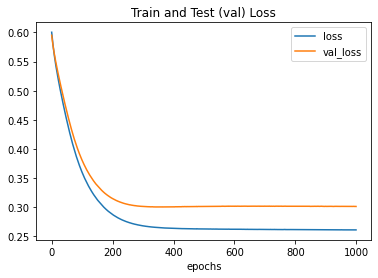

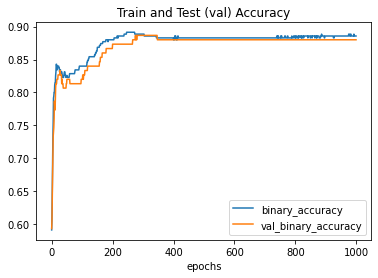

In [191]:
losses_accurs[['loss', 'val_loss']].plot()
plt.title('Train and Test (val) Loss')
plt.xlabel('epochs')
plt.show()

losses_accurs[['binary_accuracy', 'val_binary_accuracy']].plot()
plt.title('Train and Test (val) Accuracy')
plt.xlabel('epochs')
plt.show()

#### 3.5 Predictions based on the model

In [192]:
model.predict([[0.5, -0.5]])

array([[0.9817865]], dtype=float32)

### 4. Create an image dataset and train a model

In [193]:
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [194]:
!ls

LICENSE                       models
README.md                     requirements.txt
Week9_Project_Milestone.ipynb src
data


#### Create an image dataset

In [195]:
X = []
y = []

# creating a list of classes
labels = ['camera', 'face', 'phone', 'empty']

# activation function has to be softmax because it is a multiclass output

# showing the way to the data folder
base_path = "./data/"

for i, target in enumerate(labels):
    files = os.listdir(base_path+target)
    for file in files:
        # print(file)
        # load the image
        img = keras.preprocessing.image.load_img(base_path+target+'/'+file, target_size=(224,224))
        # convert it to an array
        img_array = np.array(img)
        # append the array to X
        X.append(img_array)
        # append the numeric target to y
        y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [196]:
# write a function for the above

# Let's explore the data folder
base_path = './data/'

# Let's define the classes
classes = os.listdir(base_path)
classes.remove('.DS_Store')

def load_image(base_path):
    """it loads all the image into X and the classes in y """
    X_list = []
    y_list = []
    classes = os.listdir(base_path)
    classes.remove('.DS_Store')             # -- to remove the .DS_Store for OS systems
    for class_ in classes:
        files = os.listdir(base_path+class_)
        #print(files)
        for file in files:
            pic = keras.preprocessing.image.load_img(path=base_path+class_+'/'+f'{file}',target_size=(224,224))
            numpy_image = np.array(pic)
            processed_image = preprocess_input(numpy_image)
            X_list.append(processed_image)
            y_list.append(class_)
        
    X = np.array(X_list)
    y = np.array(y_list)
    
    return X, y, classes

In [197]:
classes

['empty', 'face', 'camera', 'phone']

In [198]:
X, y, classes = load_image(base_path)

In [199]:
X.shape

(550, 224, 224, 3)

In [200]:
y

# y to categorical
y = pd.Series(y).map({classes[0]:0, classes[1]:1, classes[2]:2, classes[3]:3})

In [201]:
y

0      0
1      0
2      0
3      0
4      0
      ..
545    3
546    3
547    3
548    3
549    3
Length: 550, dtype: int64

Set variable for early_stopping.

In [225]:
# Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', #the thing we are monitoring
    min_delta=0.0005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience=3, #number of epochs with no improvement needed for the model to stop
    verbose=1, #0 is silent, 1 means a message is displayed when something happens
    mode='auto'  
    #Exercise! More things to look up in the documentation:
    #restore_best_weights
    #baseline
)

### Build CNN with Keras

In [246]:
# clear previous sessions
K.clear_session()

# instantatiate model
m = Sequential([
    Conv2D(32, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu',
          input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    Conv2D(40, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    Conv2D(80, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    Dropout(0.2),
    
    Flatten(),
    
    Dense(10, activation='relu'),
    
    Dropout(0.5),
    
    #output has to be softmax because multiclass
    Dense(4, activation='softmax')   
])

In [203]:
# check summary
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 40)        11560     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 80)          28880     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 80)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 80)          0

### Train the model

In [248]:
# compile the model
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [249]:
# fit the model
history = m.fit(X, y, 
                batch_size=600, 
                epochs=10000, 
                validation_split=0.2, 
                callbacks=[early_stop]
               )

Epoch 1/10000
1/1 [==============================] - 11s 11s/step - loss: 22.7905 - accuracy: 0.3091 - val_loss: 14.4104 - val_accuracy: 0.0182
Epoch 2/10000
1/1 [==============================] - 6s 6s/step - loss: 6.5817 - accuracy: 0.3045 - val_loss: 2.1263 - val_accuracy: 0.0000e+00
Epoch 3/10000
1/1 [==============================] - 6s 6s/step - loss: 1.8347 - accuracy: 0.4091 - val_loss: 1.3980 - val_accuracy: 0.0000e+00
Epoch 4/10000
1/1 [==============================] - 7s 7s/step - loss: 1.3864 - accuracy: 0.3591 - val_loss: 1.3896 - val_accuracy: 0.0000e+00
Epoch 5/10000
1/1 [==============================] - 7s 7s/step - loss: 1.3898 - accuracy: 0.3023 - val_loss: 1.3905 - val_accuracy: 0.0000e+00
Epoch 6/10000
1/1 [==============================] - 7s 7s/step - loss: 1.3833 - accuracy: 0.2977 - val_loss: 1.3914 - val_accuracy: 0.0000e+00
Epoch 7/10000
1/1 [==============================] - 8s 8s/step - loss: 1.3845 - accuracy: 0.2977 - val_loss: 1.3924 - val_accuracy: 0.0

<AxesSubplot:>

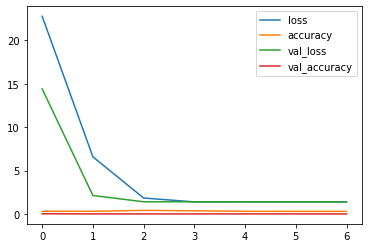

In [250]:
# Plot model accuracy and loss:
pd.DataFrame(history.history).plot()

In [251]:
_, acc = m.evaluate(X,y)
print(acc*100)

18/18 [==============================] - 1s 72ms/step - loss: 1.3857 - accuracy: 0.2382
23.818181455135345


In [252]:
# save model for later use
from tensorflow.keras.models import load_model

model.save("model1.h5")

In [253]:
model1 = load_model("model1.h5")
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               40100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Try #2

In [254]:
# clear previous sessions
K.clear_session()

# instantatiate model
m = Sequential([
    Conv2D(32, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu',
          input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    Conv2D(32, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    Dropout(0.25),
    
    Flatten(),
    
    Dense(10, activation='relu'),
    
    Dropout(0.5),
    
    #output has to be softmax because multiclass
    Dense(4, activation='softmax')   
])

In [207]:
# check summary
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                6

In [255]:
# compile the model
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [256]:
# fit the model
history = m.fit(X, y, 
                batch_size=600, 
                epochs=10000, 
                validation_split=0.2, 
                callbacks=[early_stop]
               )

Epoch 1/10000
1/1 [==============================] - 10s 10s/step - loss: 38.5406 - accuracy: 0.3000 - val_loss: 34.1105 - val_accuracy: 0.0364
Epoch 2/10000
1/1 [==============================] - 5s 5s/step - loss: 20.7270 - accuracy: 0.3659 - val_loss: 33.7650 - val_accuracy: 0.0909
Epoch 3/10000
1/1 [==============================] - 6s 6s/step - loss: 14.5916 - accuracy: 0.5159 - val_loss: 27.2251 - val_accuracy: 0.0909
Epoch 4/10000
1/1 [==============================] - 6s 6s/step - loss: 8.3207 - accuracy: 0.4932 - val_loss: 17.0107 - val_accuracy: 0.0909
Epoch 5/10000
1/1 [==============================] - 7s 7s/step - loss: 3.5905 - accuracy: 0.3636 - val_loss: 7.7646 - val_accuracy: 0.0636
Epoch 6/10000
1/1 [==============================] - 7s 7s/step - loss: 2.4474 - accuracy: 0.3205 - val_loss: 2.1747 - val_accuracy: 0.0182
Epoch 7/10000
1/1 [==============================] - 8s 8s/step - loss: 1.9942 - accuracy: 0.2386 - val_loss: 1.3927 - val_accuracy: 0.0000e+00
Epoch 8

<AxesSubplot:>

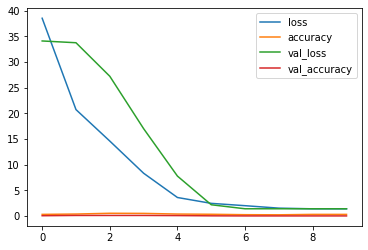

In [257]:
# Plot model accuracy and loss:
pd.DataFrame(history.history).plot()

In [258]:
_, acc = m.evaluate(X,y)
print(acc*100)

18/18 [==============================] - 1s 82ms/step - loss: 1.3855 - accuracy: 0.2382
23.818181455135345


In [260]:
model.save("model2.h5")

In [261]:
model2 = load_model("model2.h5")
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               40100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Just as bad but let's try one more time!

### Try #3

In [262]:
# clear previous sessions
K.clear_session()

# instantatiate model
m = Sequential([
    Conv2D(32, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu',
          input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    BatchNormalization(),
    
    Conv2D(40, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    BatchNormalization(),
    
    Conv2D(80, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    #Dropout(0.2),
    
    Flatten(),
    
    Dense(100, activation='relu'),
    
    #Dropout(0.5),
    
    #output has to be softmax because multiclass
    Dense(4, activation='softmax')   
])

In [263]:
# compile the model
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [264]:
# fit the model
history = m.fit(X, y, batch_size=600, epochs=10000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10000
1/1 [==============================] - 10s 10s/step - loss: 1.7344 - accuracy: 0.3432 - val_loss: 32.3183 - val_accuracy: 0.0909
Epoch 2/10000
1/1 [==============================] - 6s 6s/step - loss: 0.4494 - accuracy: 0.8591 - val_loss: 46.2949 - val_accuracy: 0.0909
Epoch 3/10000
1/1 [==============================] - 6s 6s/step - loss: 0.2831 - accuracy: 0.9091 - val_loss: 50.7054 - val_accuracy: 0.0909
Epoch 4/10000
1/1 [==============================] - 9s 9s/step - loss: 0.2221 - accuracy: 0.9341 - val_loss: 53.8054 - val_accuracy: 0.0909
Epoch 00004: early stopping


<AxesSubplot:>

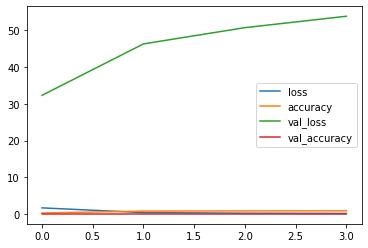

In [265]:
# Plot model accuracy and loss:
pd.DataFrame(history.history).plot()

In [266]:
_, acc = m.evaluate(X,y)
print(acc*100)

18/18 [==============================] - 2s 122ms/step - loss: 14.6618 - accuracy: 0.3491
34.90909039974213


In [267]:
model.save("model3.h5")
model3 = load_model("model3.h5")
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               40100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Accuracy is so much better but still below 70%. Let's try again!

### Try #4

In [268]:
# Clear session and build above model:
K.clear_session()   #keras would otherwise connect the following to the one we've done above

model = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu' ,input_shape = (28,28,1)),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = 'valid'),

    
    Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = 'valid'),
    
    Flatten(),
    
    Dense(100,activation='relu'),
    #Dropout(???), - optional
    Dense(10,activation= 'softmax')

    
])

In [269]:
# compile the model
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [270]:
# fit the model
history = m.fit(X, y, batch_size=600, epochs=10000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10000
1/1 [==============================] - 11s 11s/step - loss: 0.1754 - accuracy: 0.9477 - val_loss: 65.9319 - val_accuracy: 0.0909
Epoch 2/10000
1/1 [==============================] - 6s 6s/step - loss: 1.1147 - accuracy: 0.5455 - val_loss: 53.7531 - val_accuracy: 0.0909
Epoch 3/10000
1/1 [==============================] - 6s 6s/step - loss: 0.1583 - accuracy: 0.9477 - val_loss: 45.7202 - val_accuracy: 0.0909
Epoch 4/10000
1/1 [==============================] - 7s 7s/step - loss: 0.2098 - accuracy: 0.9273 - val_loss: 43.6817 - val_accuracy: 0.0909
Epoch 5/10000
1/1 [==============================] - 7s 7s/step - loss: 0.3347 - accuracy: 0.8727 - val_loss: 44.9983 - val_accuracy: 0.0909
Epoch 6/10000
1/1 [==============================] - 7s 7s/step - loss: 0.2358 - accuracy: 0.9068 - val_loss: 47.3827 - val_accuracy: 0.0909
Epoch 7/10000
1/1 [==============================] - 7s 7s/step - loss: 0.1276 - accuracy: 0.9591 - val_loss: 49.3495 - val_accuracy: 0.0909
Epoch 00007

<AxesSubplot:>

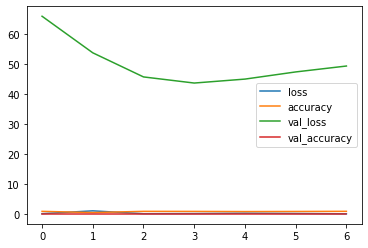

In [271]:
# Plot model accuracy and loss:
pd.DataFrame(history.history).plot()

In [272]:
_, acc = m.evaluate(X,y)
print(acc*100)

18/18 [==============================] - 2s 97ms/step - loss: 15.2772 - accuracy: 0.3491
34.90909039974213


In [273]:
model.save("model4.h5")
model4 = load_model("model4.h5")
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               40100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Not much improvement so Batch Normalisation did not do much. One last time with CNN?

### Try #5

In [274]:
# clear previous sessions
K.clear_session()

# instantatiate model
m = Sequential([
    Conv2D(32, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu',
          input_shape=(224,224,3)),
    
    Conv2D(40, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
   
    
    #BatchNormalization(),
    
    
    Conv2D(80, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    
    Conv2D(100, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
      
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
   
    #BatchNormalization(),

    
    Conv2D(120, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    
    Conv2D(160, kernel_size=(3,3), strides=(2,2),
          padding='same', activation='relu'),
    
    MaxPooling2D(pool_size=(3,3), strides=(2,2), 
                 padding='same'),
    
    Dropout(0.2),
    
    Flatten(),
    
    Dense(100, activation='relu'),

    Dense(100, activation='relu'),

    Dropout(0.5),
    
    #output has to be softmax because multiclass
    Dense(4, activation='softmax')   
])

In [275]:
# compile the model
m.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy']
         )

In [276]:
# fit the model
history = m.fit(X, y, 
                batch_size=600, 
                epochs=10000, 
                validation_split=0.2, 
                callbacks=[early_stop]
               )

Epoch 1/10000
1/1 [==============================] - 11s 11s/step - loss: 1.7464 - accuracy: 0.3182 - val_loss: 4.3697 - val_accuracy: 0.0091
Epoch 2/10000
1/1 [==============================] - 5s 5s/step - loss: 1.2664 - accuracy: 0.4386 - val_loss: 4.8504 - val_accuracy: 0.0909
Epoch 3/10000
1/1 [==============================] - 5s 5s/step - loss: 1.1334 - accuracy: 0.5364 - val_loss: 3.4352 - val_accuracy: 0.0636
Epoch 4/10000
1/1 [==============================] - 6s 6s/step - loss: 0.8566 - accuracy: 0.6318 - val_loss: 3.5292 - val_accuracy: 0.0545
Epoch 5/10000
1/1 [==============================] - 7s 7s/step - loss: 0.8339 - accuracy: 0.6477 - val_loss: 3.8803 - val_accuracy: 0.0818
Epoch 6/10000
1/1 [==============================] - 6s 6s/step - loss: 0.6485 - accuracy: 0.7727 - val_loss: 4.9786 - val_accuracy: 0.0909
Epoch 00006: early stopping


<AxesSubplot:>

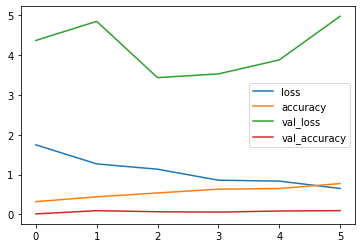

In [277]:
# Plot model accuracy and loss:
pd.DataFrame(history.history).plot()

In [278]:
_, acc = m.evaluate(X,y)
print(acc*100)

18/18 [==============================] - 2s 105ms/step - loss: 1.3232 - accuracy: 0.7127
71.27272486686707


That was a much better accuracy. Let's stop for now and try predicting based on the latest model.

In [280]:
model.save("model5.h5")
# here you can stop your notebook
model5 = load_model("model5.h5")
#model5.summary()

In [310]:
predictions = m.predict(X)
predictions[0]

array([0.9491689 , 0.00873839, 0.02751462, 0.01457797], dtype=float32)

Now, I am curious about building ANN with pretrained model in the base.

In [285]:
# create base_model with vgg16
base_model = keras.applications.vgg16.VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)

58900480/58889256 [==============================] - 9s 0us/step


In [286]:
for layers in base_model.layers[:]: 
    layers.trainable = False # --> all layers frozen means they are not trainable

In [287]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [311]:
out_features_vector = base_model.predict(X)
out_features_vector.shape

(550, 7, 7, 512)

#### Feed the Logistic. Regression model.

First flatten the vector.

In [312]:
X_reshaped = out_features_vector.reshape((550,7*7*512))
X_reshaped.shape

(550, 25088)

#### Train Test Split

In [313]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [314]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_reshaped, y.values, test_size=.30,random_state=42)

#### Train LR

In [315]:
logi = LogisticRegression()
logi.fit(Xtrain,ytrain)

LogisticRegression()

In [316]:
ypred_train=logi.predict(Xtrain)
ypred_test = logi.predict(Xtest)

In [317]:
# validation
scores_train = cross_val_score(logi,Xtrain,ytrain,cv=10)
scores_train

array([0.94871795, 0.94871795, 1.        , 1.        , 1.        ,
       0.97368421, 1.        , 0.97368421, 0.94736842, 0.97368421])

In [318]:
print(f"accuracy score on train: {accuracy_score(ytrain,ypred_train)}")
print(f"accuracy score on test: {accuracy_score(ytest,ypred_test)}")


accuracy score on train: 1.0
accuracy score on test: 0.9818181818181818


In [325]:
K.clear_session()
new_model = keras.models.Sequential([
    
    # Base model
    base_model,
    
    # Flatten layer
    keras.layers.Flatten(),
    
    #keras.layers.Dropout(.5),
    # fc1 fully connected layer
    keras.layers.Dense(units=30, activation=keras.activations.relu, name='fc1'),
    
    # fc2 fully connected layer
    keras.layers.Dense(units=15, activation=keras.activations.relu, name='fc2'),
    
    # output layer
    keras.layers.Dense(units=4, activation=keras.activations.softmax, name='otput')

])

In [326]:
new_model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy']
                 )

In [ ]:
history = new_model.fit(X,y,
                        batch_size=600, 
                        epochs=10000,
                        validation_split=0.2,
                        callbacks=[early_stop])

Epoch 1/10000


In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.01,1)
plt.savefig('conv_frozen_new_fcl.png')

In [ ]:
new_model.save('new_denselayers.h5')

### 5. Classify images from your webcam with a pre-trained network

#### 5.1 Initialise pretrained network - imagenet

In [154]:
#We use the pre-loaded weights from training on the imagenet dataset - 
#Keras will download the weights the first time you run this
vgg_model = vgg16.VGG16(weights='imagenet')

In [155]:
def predict_frame(image):
    # reverse color channels
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # reshape image to (1, 224, 224, 3)
    image_batch = np.expand_dims(numpy_image, axis=0)

    # apply pre-processing
    image = preprocess_input(image)
    
    #predictions
    predictions = vgg.model.predict(image)
    label_vgg = keras.applications.imagenet_utils.decode_predictions(
    predictions)
    
    return label_vgg
    
    

def key_action():
    # https://www.ascii-code.com/
    k = cv2.waitKey(1)
    if k == 113: # q button
        return 'q'
    if k == 32: # space bar
        return 'space'
    if k == 112: # p key
        return 'p'
    return None


def init_cam(width, height):
    """
    setups and creates a connection to the webcam
    """

    logging.info('start web cam')
    cap = cv2.VideoCapture(0)

    # Check success
    if not cap.isOpened():
        raise ConnectionError("Could not open video device")
    
    # Set properties. Each returns === True on success (i.e. correct resolution)
    assert cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
    assert cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

    return cap


def add_text(text, frame):
    # Put some rectangular box on the image
    # cv2.putText()
    return NotImplementedError